In [35]:
from matplotlib import pyplot as plt
from pandas import read_excel
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels
import scipy
import numpy as np

In [14]:
df = read_excel('http://itpaper.co.kr/data/cars93.xlsx', engine='openpyxl')
df

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Volkswagen,Eurovan,Van,16.6,19.7,22.7,17,21,None,Front,...,7,187,115,72,38,34.0,NaN,3960,non-USA,Volkswagen Eurovan
89,Volkswagen,Passat,Compact,17.6,20.0,22.4,21,30,None,Front,...,5,180,103,67,35,31.5,14.0,2985,non-USA,Volkswagen Passat
90,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18,25,None,Front,...,4,159,97,66,36,26.0,15.0,2810,non-USA,Volkswagen Corrado
91,Volvo,240,Compact,21.8,22.7,23.5,21,28,Driver only,Rear,...,5,190,104,67,37,29.5,14.0,2985,non-USA,Volvo 240


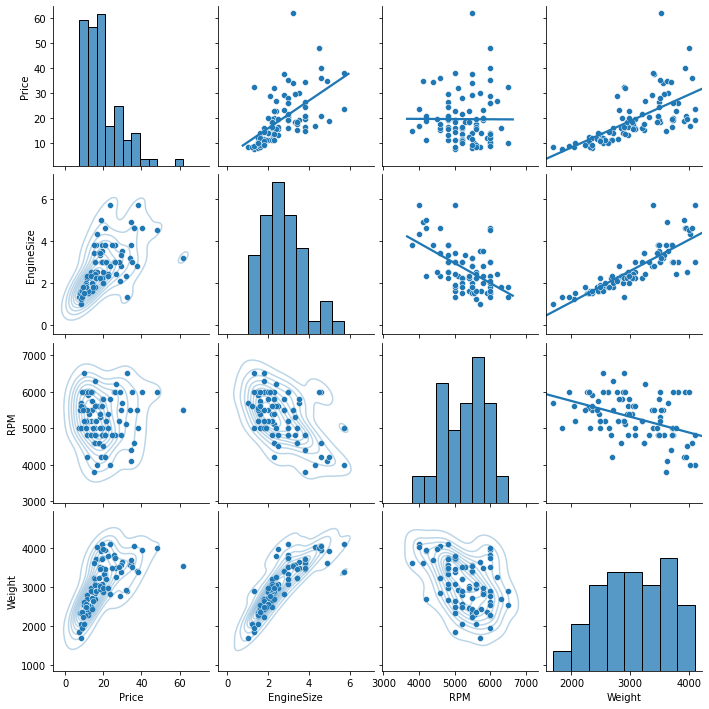

In [17]:
g = sns.pairplot(df.filter(['Price', 'EngineSize', 'RPM', 'Weight']))
g.map_upper(sns.regplot, scatter=False, truncate=False, ci=False)
g.map_lower(sns.kdeplot, alpha=0.3)
plt.savefig('smat.png', dpi=200, bbox_inches='tight')
plt.show()

In [18]:
model = ols('Price ~ EngineSize + RPM + Weight', data = df)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     37.98
Date:                Thu, 17 Jun 2021   Prob (F-statistic):           6.75e-16
Time:                        16:28:54   Log-Likelihood:                -304.05
No. Observations:                  93   AIC:                             616.1
Df Residuals:                      89   BIC:                             626.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -51.7933      9.106     -5.688      0.000     -69.887     -33.699
EngineSize     4.3054      1.325      3.249      0.002       1.673       6.938
RPM            0.0071      0.001      5.208      0.000       0.004       0.010
Weight         0.0073      0.002      3.372      0.001       0.003       0.012
==============================================================================
Omnibus:                       62.441   Durbin-Watson:                   1.406
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              361.880
Skew:                           2.076   Prob(JB):                     2.62e-79
Kurtosis:                      11.726   Cond. No.                     8.27e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 3) 회귀분석 결과 해석

---

### 결정계수 확인

- 다중 선형 회귀분석에서는 표준 결정계수(Adj. R-squared) 값을 더 주요하게 확인. (독립변수가 늘어날 수록 R-squared값은 커지기 때문)
- 결정계수 값이 각각 `0.561`, `0.547`이므로 이 회귀식이 데이터를 적절하게 설명하고 있다고 보기는 어렵다. (설명력이 약하다)
- **설명력이란?**
    - 회귀계수 R^2을 의미.
    - 0에서 1사이의 값.
    - 0에 가까운 경우는 잔차가 매우 크기 때문에 회귀식을 통해서 실제 데이터를 유추하기 어렵다.
    - 1에 가까운 경우는 잔차가 매우 작으므로 회귀식을 통해서 실제 데이터를 유추하기 쉽다.
    - 설명력이 낮다는 것은 예측값의 정밀도가 떨어질 수 있다는 것을 의미함.

### 모형의 적합도 확인

- F값과 F값에 대한 유의 확률 확인
- F통계량은 `37.98`, 유의확률 p-value값은 `6.75e-16`으로 유의수준 5%하에서 추정된 회귀 모형은 통계적으로 유의하다.

### 회귀계수 확인 후 해석

- 회귀계수들의 p-value가 0.05보다 작으므로 회귀계수들의 추정치들이 통계적으로 유의하다.
- 결정계수가 낮아 데이터의 설명력은 낮지만
회귀분석 결과에서 회귀계수들이 통계적으로 유의하기 때문에 자동차의 가격을 엔진의 크기와 RPM, 무게로 추정할 수 있다.

## 4) 다중 공선성 확인

---

### 다중 공선성

- 하나의 독립변수가 하나 이상의 다른 독립변수와 상관이 높은 경우.
- 계수 추정이 어려워지거나 불안정해져서 데이터가 약간만 바뀌어도 추정치가 크게 달라지거나 계수가 통계적으로 유의하지 않은 것으로 나올 수 있다.

### 다중 공선성의 진단

- 분산팽창계수(VIF, Variance Inflation Factor)를 구하여 진단.
- 엄밀한 기준은 없으나 보통 10보다 크면 다중공분산성이 있다고 판단. (5를 기준으로 하기도 함, 결국 분석가의 주관)

In [19]:
model.exog_names

['Intercept', 'EngineSize', 'RPM', 'Weight']

In [26]:
for i in range(1, len(model.exog_names)):
    vif = variance_inflation_factor(model.exog, i)
    print('%s의 VIF: %f' %(model.exog_names[i],vif))

EngineSize의 VIF: 4.108869
RPM의 VIF: 1.437810
Weight의 VIF: 3.520026


### 다중 공산성을 충족하지 못할 경우의 대처

1. **계수가 통계적으로 유의미하지 않다면 대처**
    - 계수가 통계적으로 유의미하다면 VIF가 크더라도 특별히 대처할 필요없음
2. **변수들을 더하거나 빼서 새로운 변수조합을 만든다**
    - (개념적으로나 이론적으로) 두 예측변수를 더하거나 빼더라도 문제가 없는 경우
    - 예) 남편의 수입과 아내의 수입이 서로 상관이 높다면, 두 개를 더해 가족 수입이라는 하나의 변수로 투입한다
3. **더하거나 빼기 어려운 경우는 변수를 모형에서 제거한다**
    - 단, 변수를 제거하는 것은 자료의 다양성을 해치고, 분석하려던 가설이나 이론에 영향을 미칠 수 있기 때문에 가급적 자제

In [27]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["font.size"] = 16
plt.rcParams['axes.unicode_minus'] = False

## 5) 4대 기본 가정 확인

### 선형성

- 예측값(fitted)과 잔차(residual)를 비교한다.
- 모든 예측값에서 가운데 점선에 맞추어 잔차가 비슷하게 있어야 한다.
- 빨간 실선은 잔차의 추세를 나타낸다.
- 빨간 실선이 점선에서 크게 벗어나지 않는다면 예측값에 따른 잔차가 일정하다는 것으로 선형성을 만족한다고 할 수 있다.

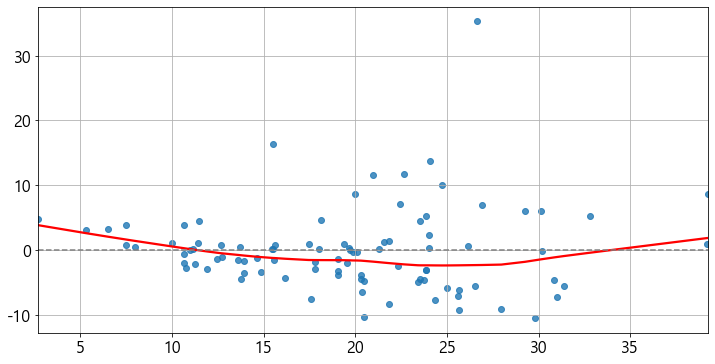

In [29]:
fitted = fit.predict(df)
residual = df['Price'] - fitted

sns.regplot(x = fitted, y = residual, lowess = True, line_kws={'color' : 'red'})
plt.plot([fitted.min(), fitted.max()], [0,0], '--', color = 'grey')
plt.grid()
plt.show()

### 잔차의 정규성

- 잔차가 정규분포를 따른다는 가정을 한다.
- Q-Q Plot(산점도)으로 확인할 수 있다.
- 잔차가 정규분포를 따른다면 Q-Q Plot에서 점들이 점선을 따라 배치되어 있어야 한다.

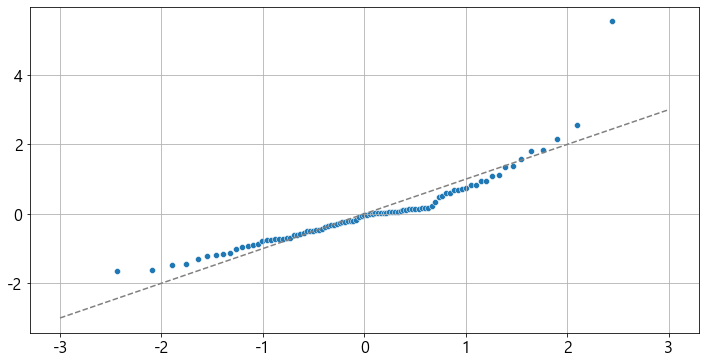

In [32]:
sr = scipy.stats.zscore(residual)
(x, y), fig = scipy.stats.probplot(sr)
sns.scatterplot(x = x, y = y)
plt.plot([-3, 3], [-3,3], linestyle='--', color='grey')
plt.grid()
plt.show()

### 잔차의 정규성 샤피로 검정

- p-value가 0.05보다 크면 유의수준 5%에서 잔차의 정규성을 충족한다고 판단한다.

In [33]:
scipy.stats.shapiro(residual)

ShapiroResult(statistic=0.8587311506271362, pvalue=5.97627476395246e-08)

### 잔차의 등분산성 확인

- 회귀 모형을 통해 예측된 값이 어떻든지 모든 값들에 대하여 잔차의 분산이 동일하다는 가정
- 아래 그래프는 예측값($x$)에 따라 잔차가 어떻게 달라지는지 보여줌.
- 빨간색 실선이 수평에 가까울 수록 등분산성이 있다는 것이다.

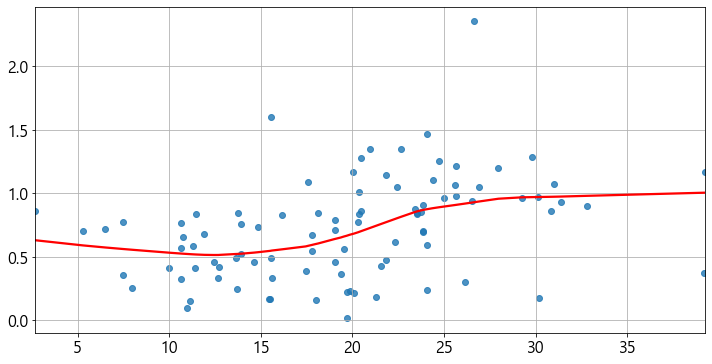

In [36]:
sns.regplot(x = fitted, y = np.sqrt(np.abs(sr)), lowess=True, line_kws = {'color' : 'red'})
plt.grid()
plt.show()

### 독립성

- Durbin-Watson 값이 `1.4` 이므로 독립성 충족
- 이 값이 0~4 사이의 값을 갖게 되며 일반적으로 2에 가까울 수록 자기상관이 존재하지 않는것으로 판정한다.
    - 0에 가까울 수록 → 양의 상관관계
    - 4에 가까울 수록 → 음의 상관관계
    - 2에 가까울 수록 → 오차향의 자기 상관이 없음.

        `1~3` 사이면 독립성 충족으로 판단.

## 6) 결과보고

---

### 모형 적합도 보고

Price에 대하여 EngineSize, RPM, Weight로 예측하는 회귀분석을 실시간 결과, 이 회귀분석은 통계적으로 유의하였다.
$F(3,89) = 37.98, \ \ \ \ p < 0.05$

### 독립변수에 대한 보고

EngineSize, RPM, Weight의 회귀계수는 각각 4.3054, 0.0071, 0.0073로, Price에 대하여 유의미한 예측 변인인것으로 나타났다.
- EngineSize
$t(89) = 3.249, \ \ \ \ p < 0.05$
- RPM
$t(89) = 5.208, \ \ \ \ p < 0.05$
- Weight
$t(89) = 3.372, \ \ \ \ p < 0.05$

In [37]:
a = fit.params
a

Intercept    -51.793292
EngineSize     4.305387
RPM            0.007096
Weight         0.007271
dtype: float64

In [43]:
print('y = %f * EngineSize + %f * RPM + %f * Weight + %f' % (a['EngineSize'], a['RPM'], a['Weight'], a['Intercept']))

y = 4.305387 * EngineSize + 0.007096 * RPM + 0.007271 * Weight + -51.793292


In [44]:
fit.fittedvalues

0     20.332440
1     26.899639
2     23.832325
3     24.050459
4     30.192235
        ...    
88    19.697871
89    19.681209
90    21.853071
91    18.134246
92    26.132438
Length: 93, dtype: float64

In [45]:
fit.predict({'EngineSize': list(range(10, 30)), 'RPM': list(range(30, 50)), 'Weight': list(range(1000, 1020))})

0     -1.255401
1      3.064353
2      7.384108
3     11.703862
4     16.023616
5     20.343370
6     24.663125
7     28.982879
8     33.302633
9     37.622387
10    41.942142
11    46.261896
12    50.581650
13    54.901405
14    59.221159
15    63.540913
16    67.860667
17    72.180422
18    76.500176
19    80.819930
dtype: float64

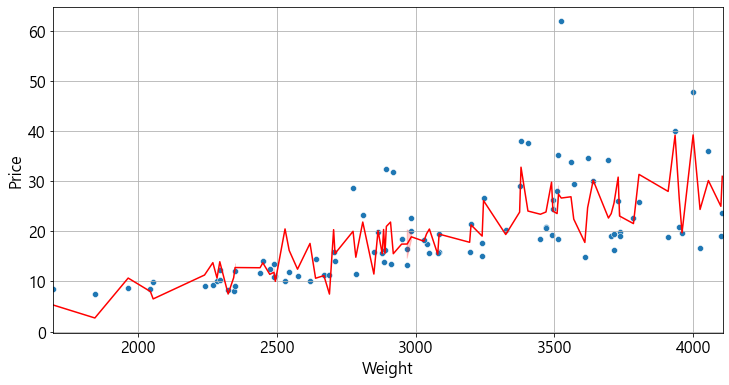

In [46]:
sns.scatterplot(x='Weight', y = 'Price', data =df)
sns.lineplot(x='Weight', y = fit.fittedvalues, data=df, color='red')

plt.xlim(df['Weight'].min()-1, df['Weight'].max() + 1)
plt.grid()
plt.show()